# 无监督-降维-NMF-PCA-图像

## NMF方法及实例

- 非负矩阵分解（NMF）
- 非负矩阵分解（Non-negative Matrix Factorization ，NMF）是在矩阵中所有元素均为非负数约束条件之下的矩阵分解方法。
- 基本思想：给定一个非负矩阵V，NMF能够找到一个非负矩阵W和一个非负矩阵H，使得矩阵W和H的乘积近似等于矩阵V中的值。


- W矩阵：基础图像矩阵，相当于从原矩阵V中抽取出来的特征
- H矩阵：系数矩阵。
- NMF能够广泛应用于图像分析、文本挖掘和语音处理等领域。

- 矩阵分解优化目标：最小化W矩阵H矩阵的乘积和原始矩阵之间的差别，目标函数如下：


## sklearn中非负矩阵分解


- 在sklearn库中，可以使用sklearn.decomposition.NMF加载NMF算法，主要参数有：
    - n_components：用于指定分解后矩阵的单个维度k；
    - init：W矩阵和H矩阵的初始化方式，默认为‘nndsvdar’。

## 实例：NMF人脸数据特征提取

- 目标：已知Olivetti人脸数据共400个，每个数据是64\*64大小。由于NMF分解得到的W矩阵相当于从原始矩阵中提取的特征，那么就可以使用NMF对400个人脸数据进行特征提取。

- 通过设置k的大小，设置提取的特征的数目。在本实验中设置k=6，随后将提取的特征以图像的形式展示出来。

** 1. 建立工程，导入sklearn相关工具包： **

** 2. 设置基本参数并加载数据： **

** 3. 设置图像的展示方式： **


** 4. 降维后数据点的可视化： **

In [4]:
%matplotlib inline

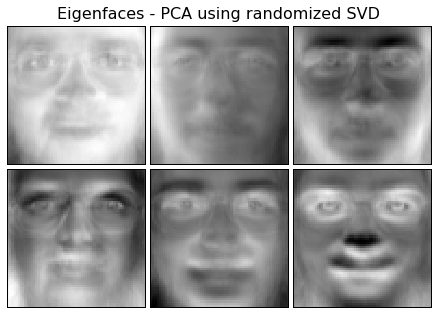

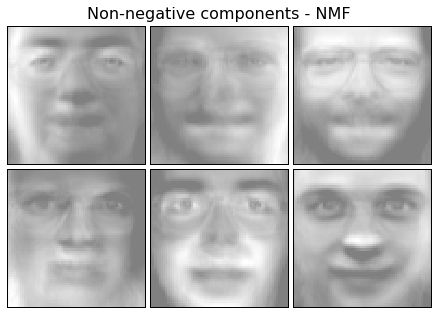

In [5]:
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState

n_row, n_col = 2, 3 
n_components = n_row * n_col

image_shape = (64, 64)

dataset = fetch_olivetti_faces(shuffle=True, random_state = RandomState(0))
faces = dataset.data

def plot_gallery(title, image, n_col = n_col, n_row = n_row):
	plt.figure(figsize = (2. * n_col, 2.26 * n_row))
	plt.suptitle(title, size = 16)
	for i, comp in enumerate(image):
		plt.subplot(n_row, n_col, i + 1)
		vmax = max(comp.max(), -comp.min())

		plt.imshow(comp.reshape(image_shape), cmap = plt.cm.gray, interpolation = 'nearest', vmin = -vmax, vmax = vmax)
		plt.xticks(())
		plt.yticks(())
	plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

estimators = [
('Eigenfaces - PCA using randomized SVD',
  decomposition.PCA(n_components = 6, whiten = True)),
('Non-negative components - NMF',
  decomposition.NMF(n_components = 6, init = 'nndsvda', tol = 5e-3))]

for name, estimator in estimators:
	estimator.fit(faces)
	components_ = estimator.components_

	plot_gallery(name, components_[:n_components])

plt.show()
